In [168]:
#Import libraray pandas sklearn processing dan kmeans dan matplotlib
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [169]:
#Memasukkan dataset
nilai1 = pd.read_csv('dataset.csv')
nilai1

,ASL,Nama,Matematika,Fisika,Kimia,Biologi,Sejarah,Akuntansi,Sosiologi,Geografi
0,2012173,Afgansyah,79,75,75,85,76,78,76,80
1,2012174,Denny Sumargo,84,76,79,77,76,77,75,81
2,2012175,Lina Nur Aini,77,84,78,85,92,89,77,82
3,2012176,Ananda Anugrah,78,86,84,77,78,77,75,75
4,2012177,Putri Khadijah,82,82,81,91,90,82,79,91
5,2012178,Ika Inayah,75,75,70,82,75,75,79,75
6,2012179,Wa Ode Sofia Z.,77,75,75,89,80,80,75,75
7,2012180,Budy Santoso,77,76,70,77,77,80,75,80
8,2012181,Andi Eka Murti,79,76,75,84,77,81,76,77
9,2012182,Ahsan Muhajir,80,75,75,75,75,78,77,79


In [170]:
#Membaca dataset untuk prediksi nanti
nilai2 = pd.read_csv('nilai2.csv')
nilai2

,Matematika,Fisika,Kimia,Biologi,Sejarah,Akuntansi,Sosiologi,Geografi
0,50,60,77,80,90,95,45,88
1,90,85,87,90,88,55,68,77
2,75,77,56,73,84,63,79,55


In [171]:
#Preprocessing untuk menghapus ASL dan NAMA
nilai1.drop(columns = ["ASL", "Nama"], inplace = True)
nilai1.dropna(inplace = True)
nilai1

,Matematika,Fisika,Kimia,Biologi,Sejarah,Akuntansi,Sosiologi,Geografi
0,79,75,75,85,76,78,76,80
1,84,76,79,77,76,77,75,81
2,77,84,78,85,92,89,77,82
3,78,86,84,77,78,77,75,75
4,82,82,81,91,90,82,79,91
5,75,75,70,82,75,75,79,75
6,77,75,75,89,80,80,75,75
7,77,76,70,77,77,80,75,80
8,79,76,75,84,77,81,76,77
9,80,75,75,75,75,78,77,79


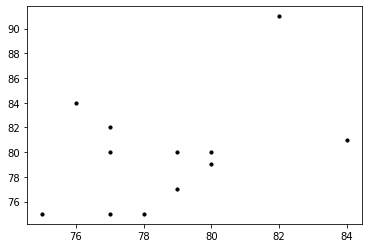

In [172]:
plt.scatter(nilai1.iloc[:,0], nilai1.iloc[:,7], s = 10, c = "black")

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


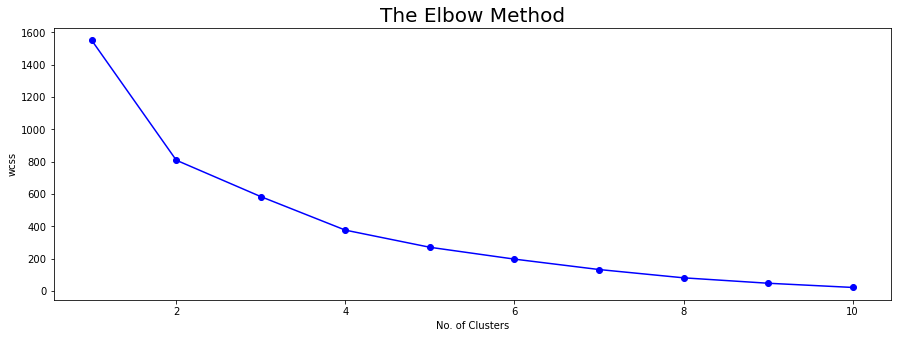

In [173]:
wcss = []
for i in range (1, 11) :
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 10)
    km.fit(nilai1)
    wcss.append(km.inertia_)
plt.figure(figsize = (15,5))
plt.plot(range(1,11), wcss, 'bo-')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [174]:
#Membentuk 3 cluster untuk data yang akan diproses selanjutnya
kmeans = KMeans(n_clusters = 3)
kmeans.fit(nilai1)

KMeans(n_clusters=3)

In [175]:
#Melakukan prediksi data akan masuk ke cluster mana antara 0, 1 atau 2
labels = kmeans.predict(nilai1)
print(labels)

[0 1 2 1 2 0 0 1 0 1 1 1]


In [176]:
#Menentukan titik centroid
centroids = kmeans.cluster_centers_
print(centroids)

[[77.5        75.25       73.75       85.         77.         78.5
  76.5        76.75      ]
 [79.16666667 76.83333333 76.33333333 76.5        76.83333333 78.33333333
  76.33333333 79.83333333]
 [79.5        83.         79.5        88.         91.         85.5
  78.         86.5       ]]


In [177]:
n_iter = kmeans.n_iter_
print(n_iter)

4


In [178]:
#Mengubah data agar bisa divisualisasikan
nilai1 = nilai1.values

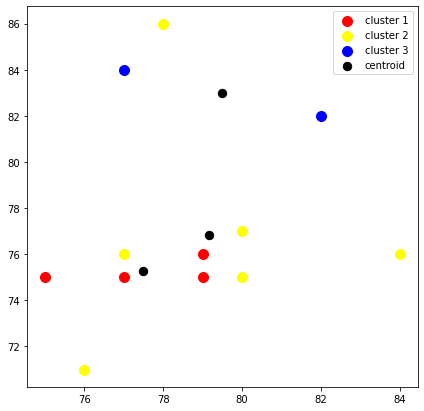

In [179]:
#Visualisasi dari prediksi yang sudah terbentuk tadi
fig = plt.figure(figsize = (7,7))

plt.scatter(nilai1[labels == 0, 0], nilai1[labels == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(nilai1[labels == 1, 0], nilai1[labels == 1, 1], s = 100, c = 'yellow', label = 'cluster 2')
plt.scatter(nilai1[labels == 2, 0], nilai1[labels == 2, 1], s = 100, c = 'blue', label = 'cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 70, c = 'black', label = 'centroid')
plt.legend()
plt.show()

In [180]:
#Memprediksi data pada variabel nilai2
#Data pada nilai2 masuk pada cluster 0 0 0
labels2 = kmeans.predict(nilai2)
print(labels2)

[0 0 0]


In [181]:
#Memprediksi data satu persatu
print(kmeans.predict([[50, 60, 77, 80, 90, 95, 45, 88]]))

[0]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [182]:
print(kmeans.predict([[90, 85, 87, 90, 88, 55, 68, 77]]))

[0]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [183]:
print(kmeans.predict([[75, 77, 56, 73, 84, 63, 79, 55]]))

[0]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
